In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df=pd.read_csv('jshare.csv')

In [3]:
# df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
from statsmodels.tsa.stattools import adfuller

In [5]:
adfuller(df['data'])

(2.7420165734574757,
 1.0,
 11,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 82.63760283301104)

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
# model = SARIMAX(df['data'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))

In [8]:
# res = model.fit()

C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   data   No. Observations:                   84
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                 -39.002
Date:                                Sun, 04 Aug 2024   AIC                            100.005
Time:                                        19:35:26   BIC                            126.069
Sample:                                             0   HQIC                           110.447
                                                 - 84                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5892      0.207     -7.674      0.000      -1.995      -1.183
ar.L2         -0.9746      0.329     -2.964      0.003      -1.619      -0.330
ar.L3         -0.1364      0.194     -0.703      0.482      -0.517       0.244
ma.L1          0.8373      0.620      1.351      0.177      -0.378       2.052
ma.L2          0.0043      0.443      0.010      0.992      -0.864       0.873
ma.L3         -0.6599      0.551     -1.198      0.231      -1.739       0.419
ar.S.L4       -0.3582      0.756     -0.474      0.636      -1.840       1.124
ar.S.L8       -0.7750      0.812     -0.955      0.340      -2.366       0.816
ma.S.L4        0.2556      0.740      0.345      0.730      -1.195       1.707
ma.S.L8        0.8641      0.814      1.062      0.288      -0.731       2.459
sigma2         0.1450      0.126      1.151      0.250      -0.102       0.392
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                22.51
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              26.52   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# df['sarimax'] = res.fittedvalues

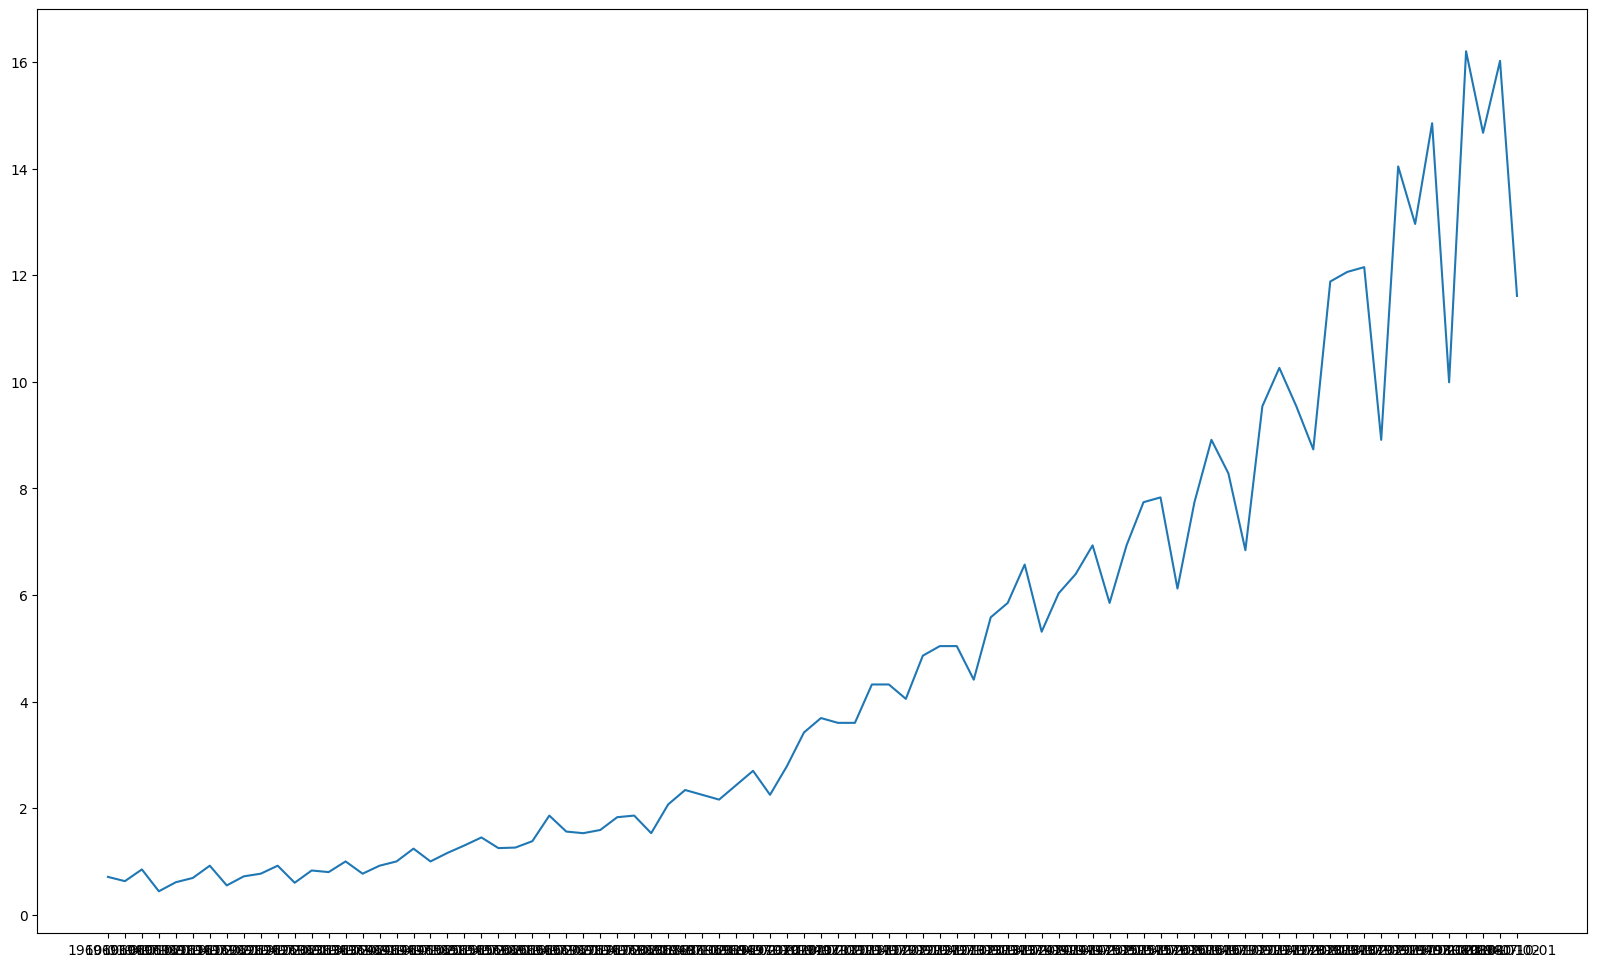

In [16]:
# plt.figure(figsize=(20, 12))
# plt.plot(df['date'], df['data'])
# plt.show()

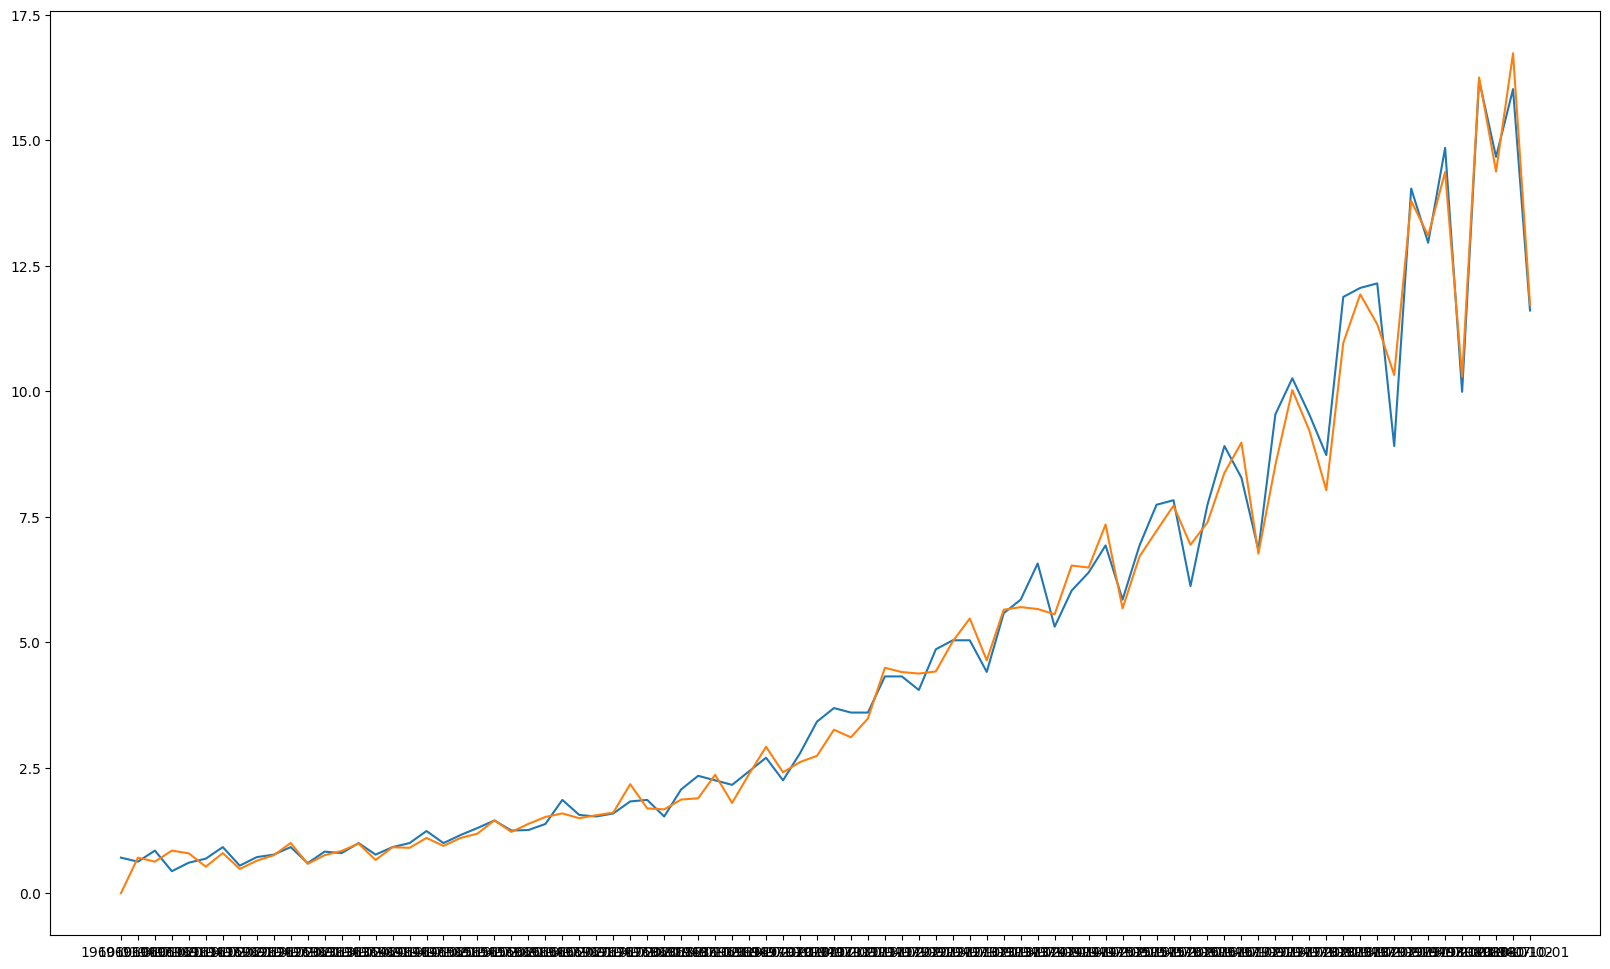

In [17]:
# plt.figure(figsize=(20, 12))
# plt.plot(df['date'], df['data'])
# plt.plot(df['date'], df['sarimax'])
# plt.show()

In [6]:
df2=pd.read_csv('DailyDelhiClimateTrain.csv')

In [7]:
model2 = SARIMAX(df2['meantemp'], order=(1, 1, 3), seasonal_order=(0, 1, 1, 4))

In [8]:
res=model2.fit()

In [9]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(1, 1, 3)x(0, 1, [1], 4)   Log Likelihood               -2770.791
Date:                             Mon, 05 Aug 2024   AIC                           5553.581
Time:                                     11:01:10   BIC                           5585.286
Sample:                                          0   HQIC                          5565.410
                                            - 1462                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2692      0.148      1.822      0.068      -0.020       0.559
ma.L1         -0.4895      0.148     -3.313      0.001      -0.779      -0.200
ma.L2         -0.0606      0.043     -1.411      0.158      -0.145       0.024
ma.L3         -0.1069      0.040     -2.695      0.007      -0.185      -0.029
ma.S.L4       -0.9913      0.006   -166.886      0.000      -1.003      -0.980
sigma2         2.5954      0.072     35.866      0.000       2.454       2.737
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               254.95
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.50
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
df2['sarimax'] = res.fittedvalues

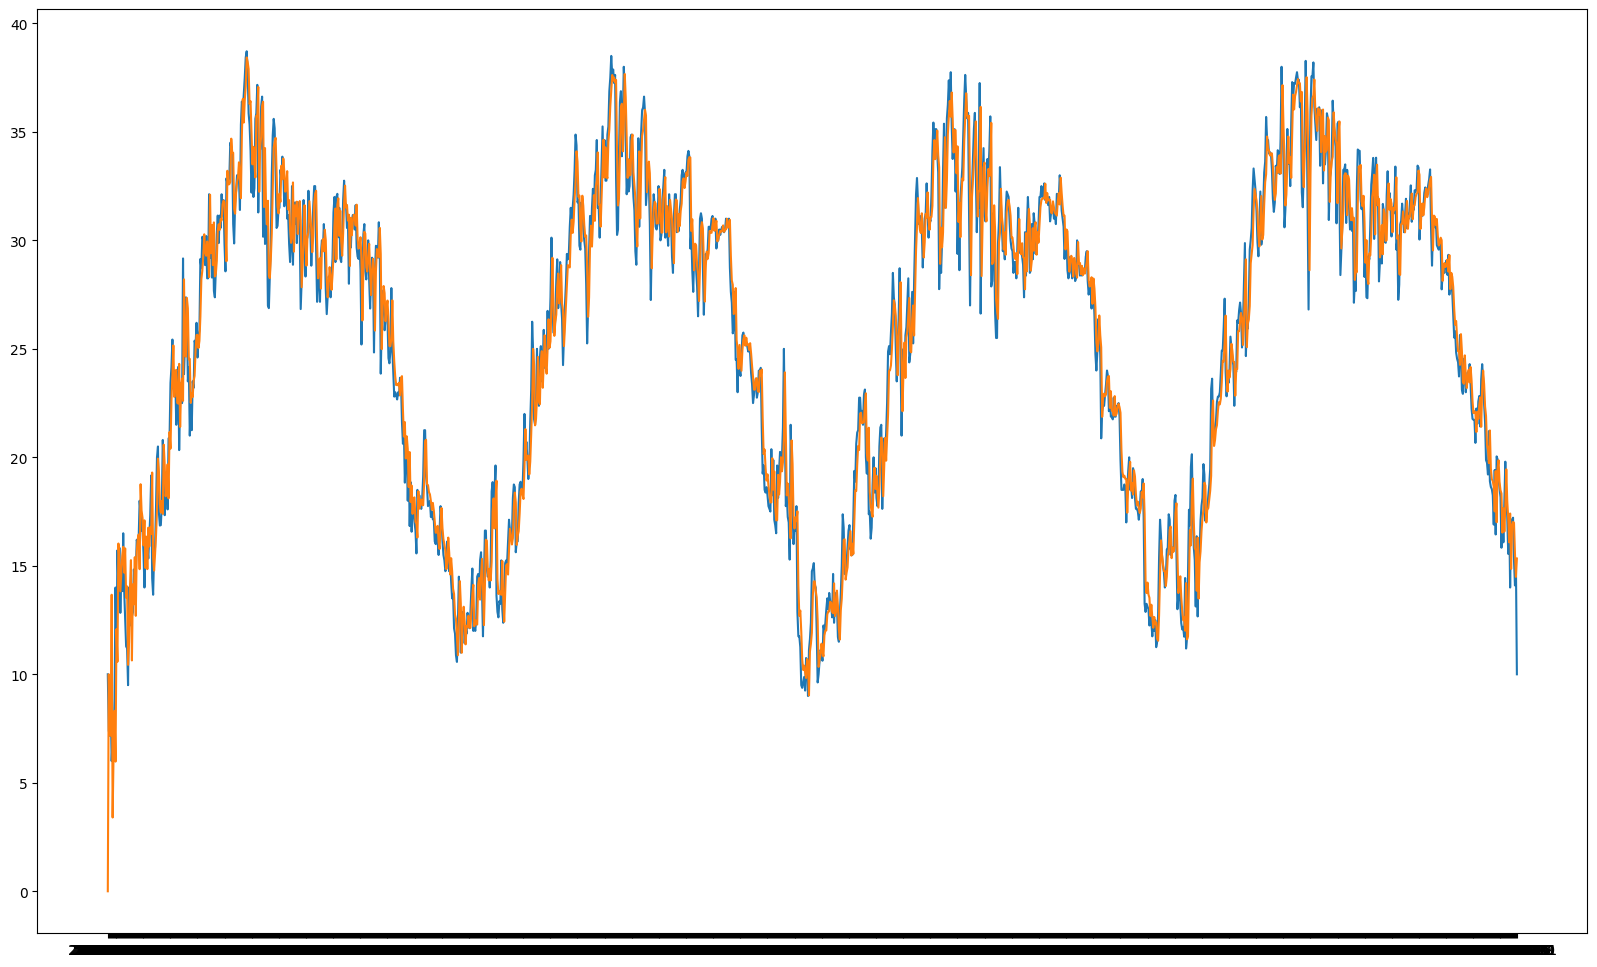

In [11]:
plt.figure(figsize=(20, 12))
plt.plot(df2['date'], df2['meantemp'])
plt.plot(df2['date'], df2['sarimax'])
plt.show()

In [25]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure,sarimax
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,0.000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,0.710
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,0.630
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,0.850
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,0.795


In [27]:
from itertools import product
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
ps = range(0, 4, 1)
ds = 1
qs = range(0, 4, 1)
s = 4
params = list(product(p, q, ps, qs))
params

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 0, 2),
 (0, 0, 0, 3),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 2),
 (0, 0, 1, 3),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 0, 2, 2),
 (0, 0, 2, 3),
 (0, 0, 3, 0),
 (0, 0, 3, 1),
 (0, 0, 3, 2),
 (0, 0, 3, 3),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 2),
 (0, 1, 0, 3),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 2),
 (0, 1, 1, 3),
 (0, 1, 2, 0),
 (0, 1, 2, 1),
 (0, 1, 2, 2),
 (0, 1, 2, 3),
 (0, 1, 3, 0),
 (0, 1, 3, 1),
 (0, 1, 3, 2),
 (0, 1, 3, 3),
 (0, 2, 0, 0),
 (0, 2, 0, 1),
 (0, 2, 0, 2),
 (0, 2, 0, 3),
 (0, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 2, 1, 2),
 (0, 2, 1, 3),
 (0, 2, 2, 0),
 (0, 2, 2, 1),
 (0, 2, 2, 2),
 (0, 2, 2, 3),
 (0, 2, 3, 0),
 (0, 2, 3, 1),
 (0, 2, 3, 2),
 (0, 2, 3, 3),
 (0, 3, 0, 0),
 (0, 3, 0, 1),
 (0, 3, 0, 2),
 (0, 3, 0, 3),
 (0, 3, 1, 0),
 (0, 3, 1, 1),
 (0, 3, 1, 2),
 (0, 3, 1, 3),
 (0, 3, 2, 0),
 (0, 3, 2, 1),
 (0, 3, 2, 2),
 (0, 3, 2, 3),
 (0, 3, 3, 0),
 (0, 3, 3, 1),
 (0, 3, 3, 2),
 (0, 3, 3, 3),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 0,

In [30]:
results = []
for order in params:
    try:
        print(order)
        model = SARIMAX(df2['meantemp'], order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[3], s))
        res = model2.fit()
        results.append([order, res.aic])
    except:
        continue

(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 0, 2)
(0, 0, 0, 3)
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 0, 1, 2)
(0, 0, 1, 3)
(0, 0, 2, 0)
(0, 0, 2, 1)
(0, 0, 2, 2)
(0, 0, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 3, 0)
(0, 0, 3, 1)
(0, 0, 3, 2)
(0, 0, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 1, 0, 0)
(0, 1, 0, 1)
(0, 1, 0, 2)
(0, 1, 0, 3)
(0, 1, 1, 0)
(0, 1, 1, 1)
(0, 1, 1, 2)
(0, 1, 1, 3)
(0, 1, 2, 0)
(0, 1, 2, 1)
(0, 1, 2, 2)
(0, 1, 2, 3)
(0, 1, 3, 0)
(0, 1, 3, 1)
(0, 1, 3, 2)
(0, 1, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 2, 0, 0)
(0, 2, 0, 1)
(0, 2, 0, 2)
(0, 2, 0, 3)
(0, 2, 1, 0)
(0, 2, 1, 1)
(0, 2, 1, 2)
(0, 2, 1, 3)
(0, 2, 2, 0)
(0, 2, 2, 1)
(0, 2, 2, 2)
(0, 2, 2, 3)
(0, 2, 3, 0)
(0, 2, 3, 1)
(0, 2, 3, 2)
(0, 2, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 3, 0, 0)
(0, 3, 0, 1)
(0, 3, 0, 2)
(0, 3, 0, 3)
(0, 3, 1, 0)
(0, 3, 1, 1)
(0, 3, 1, 2)
(0, 3, 1, 3)
(0, 3, 2, 0)
(0, 3, 2, 1)
(0, 3, 2, 2)
(0, 3, 2, 3)
(0, 3, 3, 0)
(0, 3, 3, 1)
(0, 3, 3, 2)
(0, 3, 3, 3)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 0, 2)
(1, 0, 0, 3)
(1, 0, 1, 0)
(1, 0, 1, 1)
(1, 0, 1, 2)
(1, 0, 1, 3)
(1, 0, 2, 0)
(1, 0, 2, 1)
(1, 0, 2, 2)
(1, 0, 2, 3)
(1, 0, 3, 0)
(1, 0, 3, 1)
(1, 0, 3, 2)
(1, 0, 3, 3)
(1, 1, 0, 0)
(1, 1, 0, 1)
(1, 1, 0, 2)
(1, 1, 0, 3)
(1, 1, 1, 0)
(1, 1, 1, 1)
(1, 1, 1, 2)
(1, 1, 1, 3)
(1, 1, 2, 0)
(1, 1, 2, 1)
(1, 1, 2, 2)
(1, 1, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 3, 0)
(1, 1, 3, 1)
(1, 1, 3, 2)
(1, 1, 3, 3)
(1, 2, 0, 0)
(1, 2, 0, 1)
(1, 2, 0, 2)
(1, 2, 0, 3)
(1, 2, 1, 0)
(1, 2, 1, 1)
(1, 2, 1, 2)
(1, 2, 1, 3)
(1, 2, 2, 0)
(1, 2, 2, 1)
(1, 2, 2, 2)
(1, 2, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 2, 3, 0)
(1, 2, 3, 1)
(1, 2, 3, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 2, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 3, 0, 0)
(1, 3, 0, 1)
(1, 3, 0, 2)
(1, 3, 0, 3)
(1, 3, 1, 0)
(1, 3, 1, 1)
(1, 3, 1, 2)
(1, 3, 1, 3)
(1, 3, 2, 0)
(1, 3, 2, 1)
(1, 3, 2, 2)
(1, 3, 2, 3)
(1, 3, 3, 0)
(1, 3, 3, 1)
(1, 3, 3, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 3, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 0, 0)
(2, 0, 0, 1)
(2, 0, 0, 2)
(2, 0, 0, 3)
(2, 0, 1, 0)
(2, 0, 1, 1)
(2, 0, 1, 2)
(2, 0, 1, 3)
(2, 0, 2, 0)
(2, 0, 2, 1)
(2, 0, 2, 2)
(2, 0, 2, 3)
(2, 0, 3, 0)
(2, 0, 3, 1)
(2, 0, 3, 2)
(2, 0, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 0, 0)
(2, 1, 0, 1)
(2, 1, 0, 2)
(2, 1, 0, 3)
(2, 1, 1, 0)
(2, 1, 1, 1)
(2, 1, 1, 2)
(2, 1, 1, 3)
(2, 1, 2, 0)
(2, 1, 2, 1)
(2, 1, 2, 2)
(2, 1, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 3, 0)
(2, 1, 3, 1)
(2, 1, 3, 2)
(2, 1, 3, 3)
(2, 2, 0, 0)
(2, 2, 0, 1)
(2, 2, 0, 2)
(2, 2, 0, 3)
(2, 2, 1, 0)
(2, 2, 1, 1)
(2, 2, 1, 2)
(2, 2, 1, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 2, 0)
(2, 2, 2, 1)
(2, 2, 2, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 3, 0)
(2, 2, 3, 1)
(2, 2, 3, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 0, 0)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 0, 1)
(2, 3, 0, 2)
(2, 3, 0, 3)
(2, 3, 1, 0)
(2, 3, 1, 1)
(2, 3, 1, 2)
(2, 3, 1, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 2, 0)
(2, 3, 2, 1)
(2, 3, 2, 2)
(2, 3, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 3, 0)
(2, 3, 3, 1)
(2, 3, 3, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 0, 0)
(3, 0, 0, 1)
(3, 0, 0, 2)
(3, 0, 0, 3)
(3, 0, 1, 0)
(3, 0, 1, 1)
(3, 0, 1, 2)
(3, 0, 1, 3)
(3, 0, 2, 0)
(3, 0, 2, 1)
(3, 0, 2, 2)
(3, 0, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 3, 0)
(3, 0, 3, 1)
(3, 0, 3, 2)
(3, 0, 3, 3)
(3, 1, 0, 0)
(3, 1, 0, 1)
(3, 1, 0, 2)
(3, 1, 0, 3)
(3, 1, 1, 0)
(3, 1, 1, 1)
(3, 1, 1, 2)
(3, 1, 1, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 2, 0)
(3, 1, 2, 1)
(3, 1, 2, 2)
(3, 1, 2, 3)
(3, 1, 3, 0)
(3, 1, 3, 1)
(3, 1, 3, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 0, 0)
(3, 2, 0, 1)
(3, 2, 0, 2)
(3, 2, 0, 3)
(3, 2, 1, 0)
(3, 2, 1, 1)
(3, 2, 1, 2)
(3, 2, 1, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 2, 0)
(3, 2, 2, 1)
(3, 2, 2, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 3, 0)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 3, 1)
(3, 2, 3, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 3, 3)
(3, 3, 0, 0)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 0, 1)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 0, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 0, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 1, 0)
(3, 3, 1, 1)
(3, 3, 1, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 1, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 2, 0)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 2, 1)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 2, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 2, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 3, 0)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 3, 1)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 3, 2)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 3, 3)


C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
r = pd.DataFrame(results)
r.columns = ('order', 'AIC')
r.sort_values(by='AIC', ascending=True)

,order,AIC
113,"(1, 3, 0, 1)",5553.581339
49,"(0, 3, 0, 1)",5553.986653
209,"(3, 1, 0, 1)",5554.341628
243,"(3, 3, 0, 3)",5554.612115
50,"(0, 3, 0, 2)",5555.153605
...,...,...
192,"(3, 0, 0, 0)",6650.799992
128,"(2, 0, 0, 0)",6651.214271
16,"(0, 1, 0, 0)",6651.807645
64,"(1, 0, 0, 0)",6653.252867


In [15]:
df2_test=pd.read_csv('DailyDelhiClimateTest.csv')

In [17]:
forecast = res.predict(len(df2_test['date']))
result = pd.concat([df2['sarimax'], forecast], axis=0)
print(result)

0        0.000000
1        9.999997
2        7.400000
3        7.166666
4       13.666667
          ...    
1457    17.020569
1458    16.988956
1459    15.563921
1460    14.489160
1461    15.337056
Length: 2810, dtype: float64


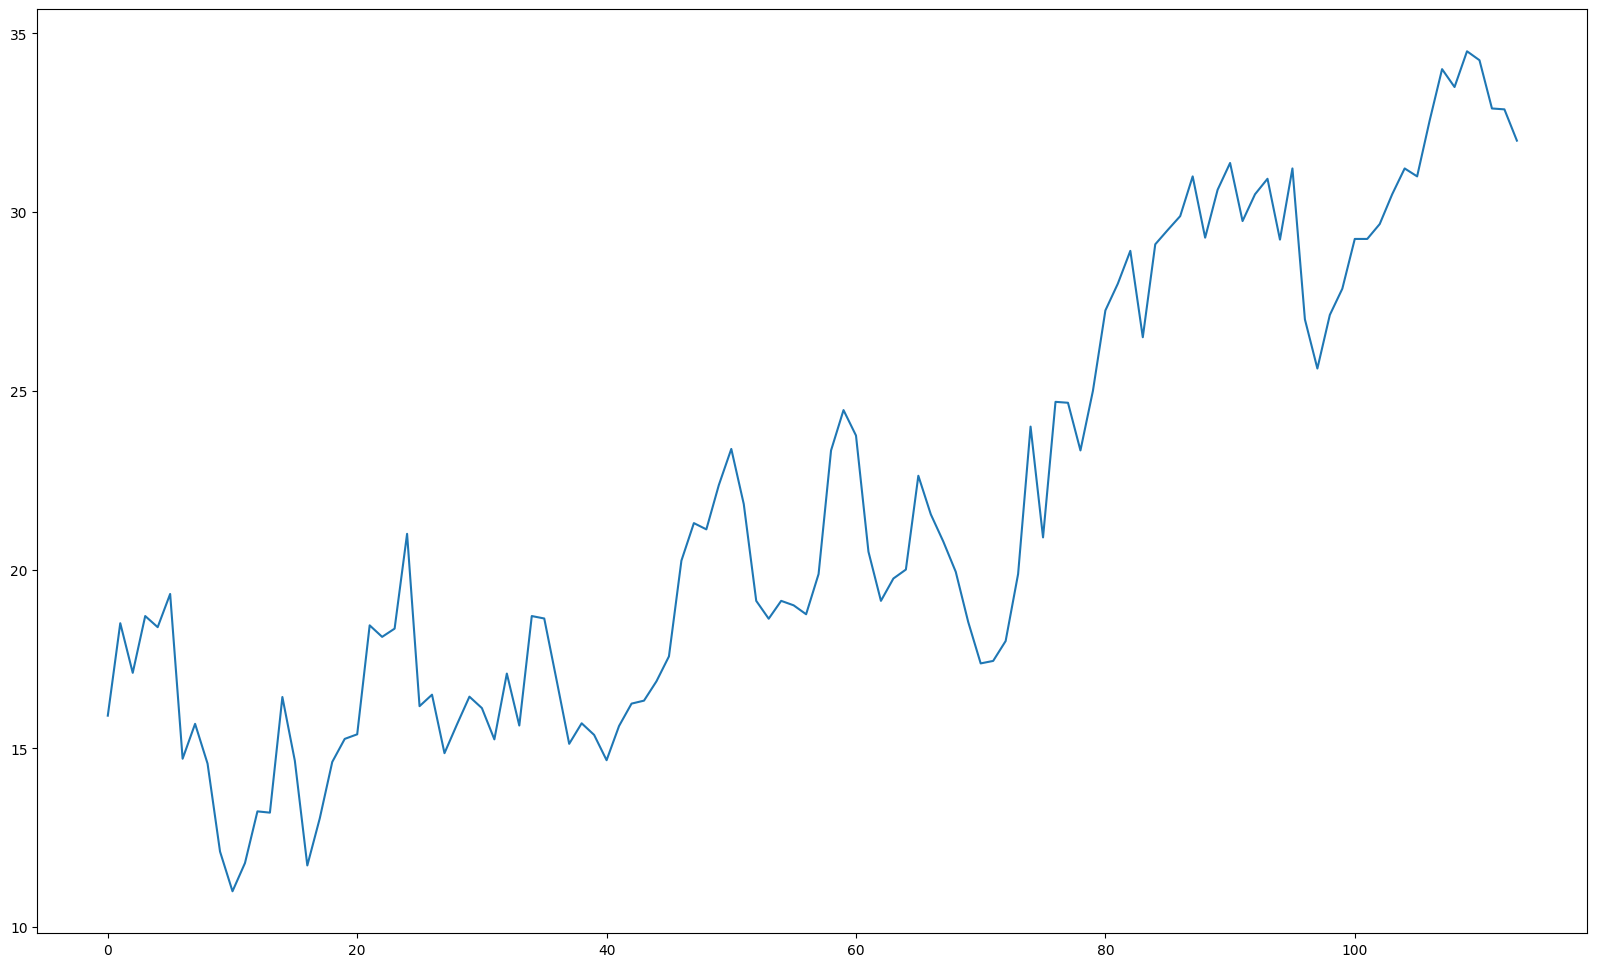

In [21]:
plt.figure(figsize=(20, 12))
plt.plot(df2_test['meantemp'])
plt.plot(forecast)
plt.show()